In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn import preprocessing as prep

# 5000Songs Example

## Import songs_df

In [2]:
songs_df = pd.read_csv("datasets\df_audio_features_5000.csv" 
                           #,index_col=["name", "artist"]
                           )
songs_df.columns = songs_df.columns.str.strip()

In [23]:
songs_df

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,clus_MinMaxScaler,clus_StandardScaler
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,23,34
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,43,8
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,47,4
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...,10,9
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...,21,20
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...,21,2
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...,8,15
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...,8,42


## Clean songs_df

In [3]:
# drop feature with string type / and all Null column
songs_c_df = songs_df.drop(["name","artist","id","html","type"],axis=1).copy()

In [4]:

songs_c_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
1,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
2,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
3,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
4,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
5231,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
5232,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3
5233,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4


In [5]:
songs_c_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5.235000e+03,5235.000000
mean,0.509503,0.653565,5.254441,-9.338098,0.646227,0.083178,0.290043,0.257337,0.185354,0.443596,118.721407,2.479112e+05,3.902961
std,0.218041,0.288335,3.571559,6.294850,0.478185,0.071193,0.355985,0.370686,0.149410,0.277725,28.568463,1.356330e+05,0.420324
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.276000e+04,0.000000
25%,0.309000,0.479000,2.000000,-11.337000,0.000000,0.039000,0.002450,0.000001,0.092500,0.196000,96.174000,1.899910e+05,4.000000
50%,0.539000,0.738000,5.000000,-7.338000,1.000000,0.055800,0.095400,0.001880,0.125000,0.417000,119.180000,2.246670e+05,4.000000
75%,0.688000,0.893000,8.000000,-5.264000,1.000000,0.098650,0.565500,0.643000,0.237000,0.677000,134.019000,2.717200e+05,4.000000
max,0.967000,1.000000,11.000000,1.342000,1.000000,0.918000,0.996000,0.985000,0.987000,0.985000,213.990000,3.815787e+06,5.000000


### Use selected features
Keep the following

- **energy**
is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.	Float

- ~~**speechiness**
detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.	Float~~

- **loudness**
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.	Float

- **acousticness**
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.	Float


- **tempo**
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.	Float


In [6]:
songs_c_df=songs_c_df.drop(["danceability","key","mode","speechiness","instrumentalness","liveness","valence","duration_ms","time_signature"],axis=1)

In [7]:
songs_c_df.describe()

,energy,loudness,acousticness,tempo
count,5235.000000,5235.000000,5235.000000,5235.000000
mean,0.653565,-9.338098,0.290043,118.721407
std,0.288335,6.294850,0.355985,28.568463
min,0.000000,-60.000000,0.000000,0.000000
25%,0.479000,-11.337000,0.002450,96.174000
50%,0.738000,-7.338000,0.095400,119.180000
75%,0.893000,-5.264000,0.565500,134.019000
max,1.000000,1.342000,0.996000,213.990000


In [8]:
songs_c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   energy        5235 non-null   float64
 1   loudness      5235 non-null   float64
 2   acousticness  5235 non-null   float64
 3   tempo         5235 non-null   float64
dtypes: float64(4)
memory usage: 163.7 KB


## Static Function defintion

In [9]:
# a Bussines need ,keep the size of all the playlists at between 50 and 250 songs.
MIN_SAMPLE_P_CLUSTER = 50
MAX_SAMPLE_P_CLUSTER = 250

In [10]:
def get_kval_range(df):
    num_samples = df.shape[0]
    min_k = round(num_samples/MAX_SAMPLE_P_CLUSTER)
    max_k = round(num_samples/MIN_SAMPLE_P_CLUSTER)
    return(min_k,max_k)

In [11]:
from sklearn import preprocessing,cluster
from sklearn.metrics import silhouette_score

def run_kmean_allscalers(df,k_value,scale):
    iner = None
    sil = None
    
    scalers = {
        "StandardScaler"      : preprocessing.StandardScaler(),
        "MinMaxScaler"        : preprocessing.MinMaxScaler(),
        "RobustScaler"        : preprocessing.RobustScaler(),
        "QuantileTransformer" : preprocessing.QuantileTransformer(n_quantiles=df.shape[0]),
        "PowerTransformer"    : preprocessing.PowerTransformer()
    }
    
    if scale in scalers:
        my_scaler = scalers[scale].set_output(transform='pandas')
        df_scaled_df = my_scaler.fit_transform(df)
        my_model = cluster.KMeans(n_clusters=k_value,n_init=10, random_state=123)
        my_model.fit(df_scaled_df)
        
        iner = round(my_model.inertia_,3)
        sil = round(silhouette_score(df_scaled_df,my_model.labels_),3)
        
        songs_df["clus_"+scale] = my_model.predict(df_scaled_df)
    else:
        print("wrong scale value given! ")

    return [iner,sil]

In [12]:
def draw_2styled_vlines(xvals,ymin,ymax):
    plt.vlines(x=xvals[0],ymin=ymin,ymax=ymax,colors="green", linestyles='dashed',label='Kvalue_1',alpha = 0.5)
    plt.vlines(x=xvals[1],ymin=ymin,ymax=ymax,colors="grey", linestyles='dashed',label='Kvalue_2',alpha = 0.5)
    plt.legend()

## Choose K Value

In [13]:
(k_min,k_max) = get_kval_range(songs_c_df) 
(k_min,k_max)


(21, 105)

In [15]:
#TODO: to speed up calculations
k_max=50
(k_min,k_max)

(21, 50)

### Use MinMaxScaler

In [16]:
scaling = "MinMaxScaler"
diff_k_inertia_l = []
diff_k_sil_score_l = []

for k_val in range(k_min,k_max):
    kmean_result = run_kmean_allscalers(songs_c_df,k_val,scaling)
    diff_k_inertia_l.append(kmean_result[0])
    diff_k_sil_score_l.append(kmean_result[1])

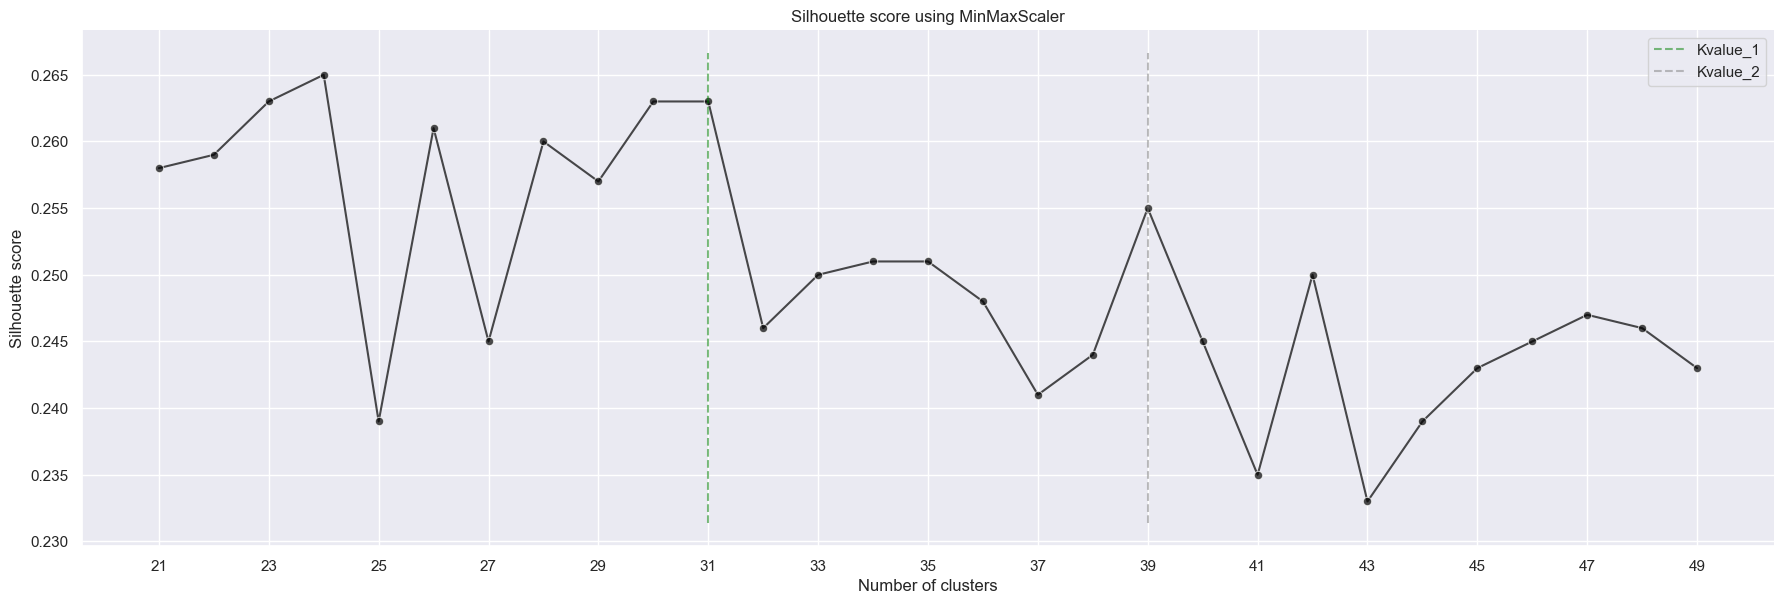

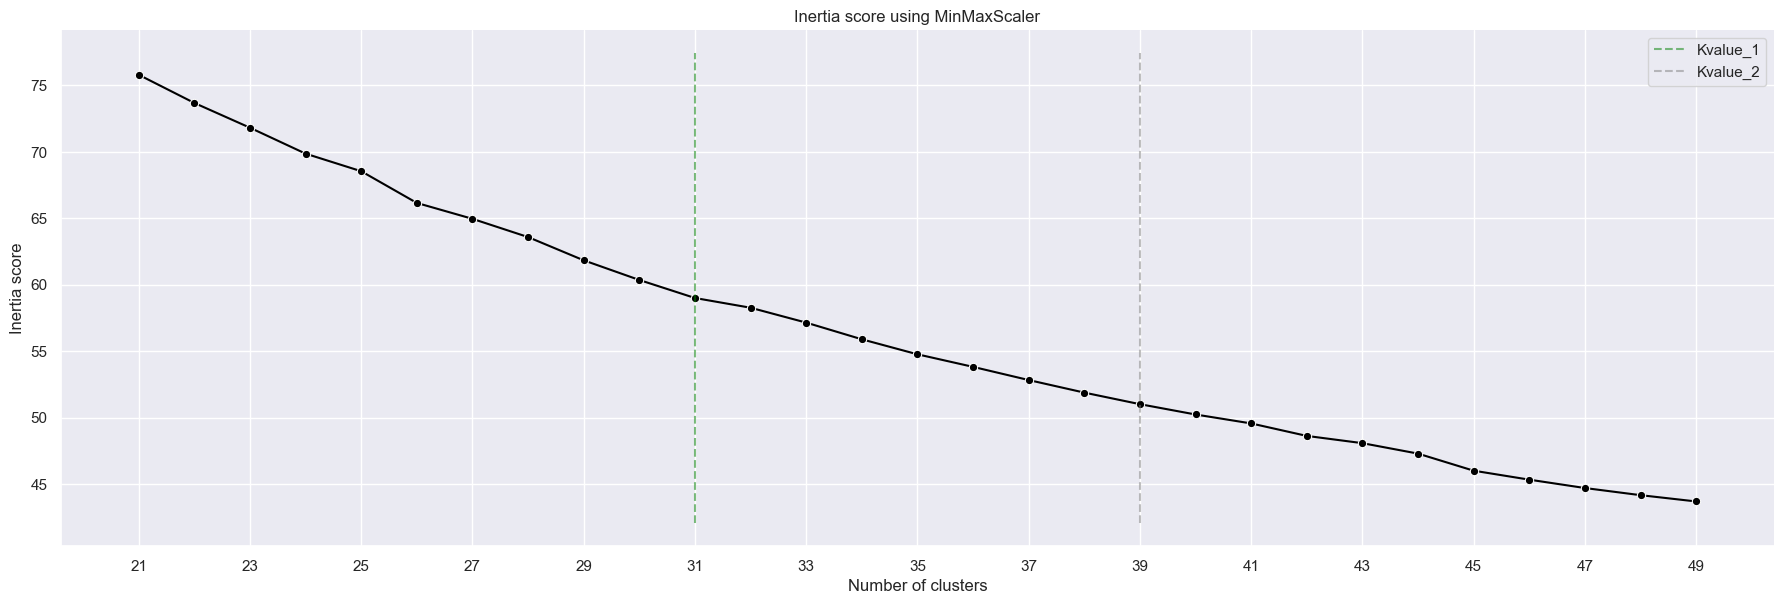

In [17]:
opt_k_vals = [31,39]

sns.set_theme(style='darkgrid', color_codes=True)

# Draw Silhouette score
plot= (
    sns.relplot(kind="line",x=range(k_min,k_max),y=diff_k_sil_score_l,marker='o',height=6,aspect=3,color="black",alpha = 0.7)
    .set(title=f"Silhouette score using {scaling}")
    .set_axis_labels("Number of clusters", "Silhouette score")
    .set(xticks=range(k_min,k_max,2))
)
ymin,ymax = plot.ax.get_ylim()
draw_2styled_vlines(opt_k_vals,ymin,ymax)


# Draw Inertia score
plot= (
    sns.relplot(kind="line",x=range(k_min,k_max),y=diff_k_inertia_l,marker='o',height=6,aspect=3,color="black")
    .set(title=f"Inertia score using {scaling}")
    .set(xlabel="Number of clusters")
    .set(ylabel="Inertia score")
    .set(xticks=range(k_min,k_max,2))
)
ymin,ymax = plot.ax.get_ylim()
draw_2styled_vlines(opt_k_vals,ymin,ymax)


plt.show()

### Use StanderdScaler

In [18]:
scaling = "StandardScaler"
diff_k_inertia_l = []
diff_k_sil_score_l = []

for k_val in range(k_min,k_max):
    kmean_result = run_kmean_allscalers(songs_c_df,k_val,scaling)
    diff_k_inertia_l.append(kmean_result[0])
    diff_k_sil_score_l.append(kmean_result[1])

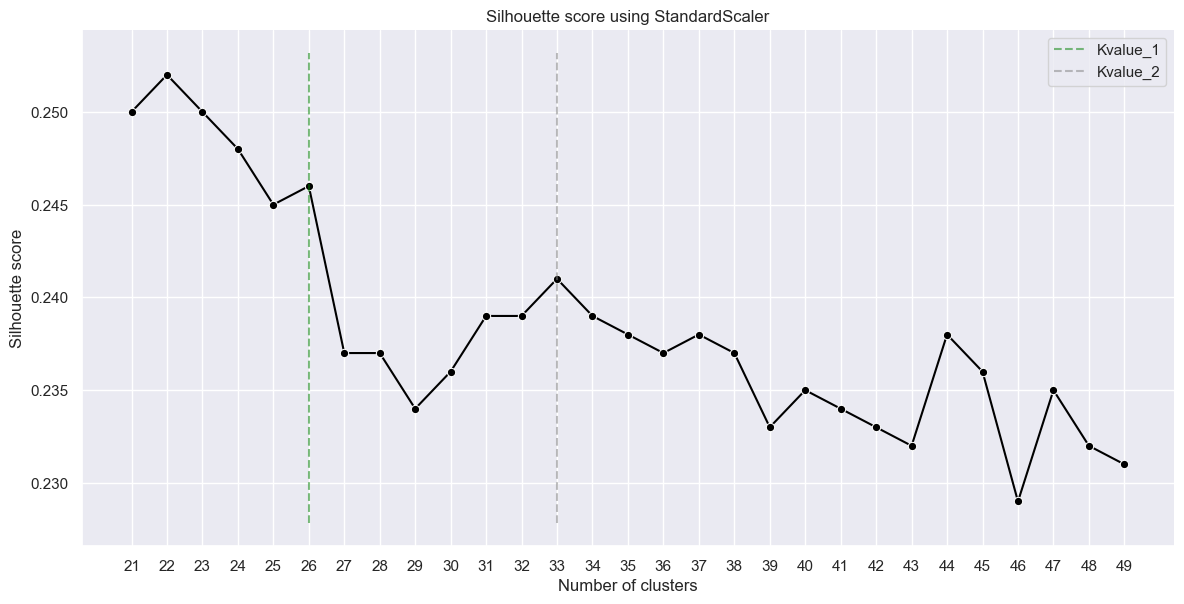

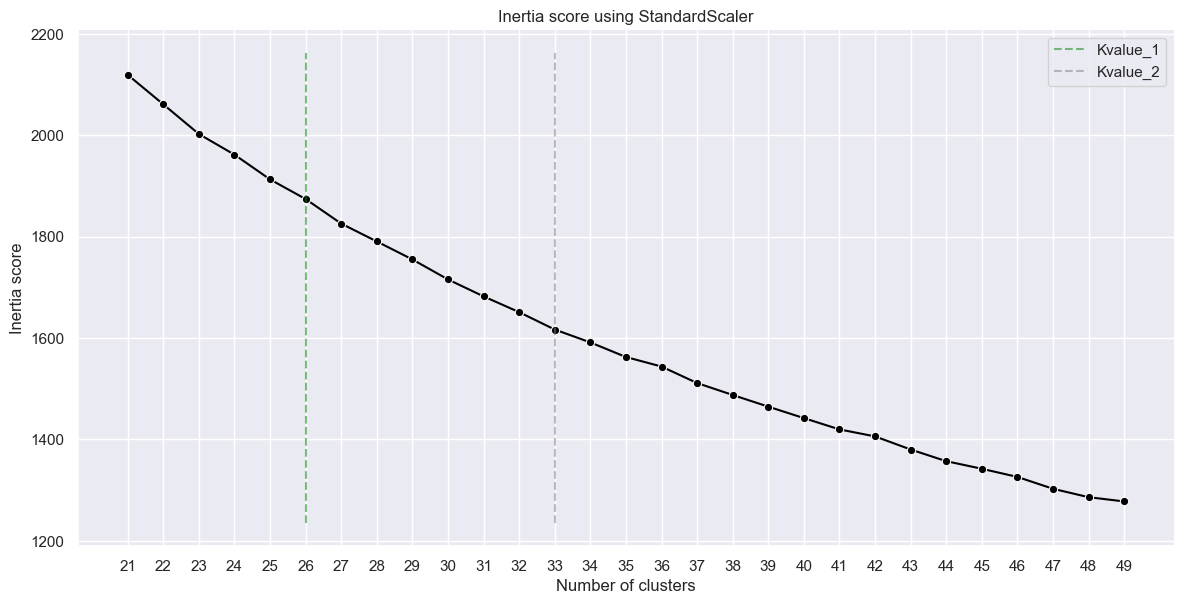

In [25]:
opt_k_vals = [26,33]
sns.set_theme(style='darkgrid', color_codes=True)

# Draw Silhouette score
plot = (
    sns.relplot(kind="line",x=range(k_min,k_max),y=diff_k_sil_score_l,marker='o',height=6,aspect=2,color="black")
    .set(title=f"Silhouette score using {scaling}")
    .set_axis_labels("Number of clusters", "Silhouette score")
    .set(xticks=range(k_min,k_max,1))
)
ymin,ymax = plot.ax.get_ylim()
draw_2styled_vlines(opt_k_vals,ymin,ymax)


# Draw Inertia score
plot = (
    sns.relplot(kind="line",x=range(k_min,k_max),y=diff_k_inertia_l,marker='o',height=6,aspect=2,color="black")
    .set(title=f"Inertia score using {scaling}")
    .set(xlabel="Number of clusters")
    .set(ylabel="Inertia score")
    .set(xticks=range(k_min,k_max,1))
)
ymin,ymax = plot.ax.get_ylim()
draw_2styled_vlines(opt_k_vals,ymin,ymax)

plt.show()

### Use RobustScaler

In [26]:
scaling = "RobustScaler"
diff_k_inertia_l = []
diff_k_sil_score_l = []

for k_val in range(k_min,k_max):
    kmean_result = run_kmean_allscalers(songs_c_df,k_val,scaling)
    diff_k_inertia_l.append(kmean_result[0])
    diff_k_sil_score_l.append(kmean_result[1])

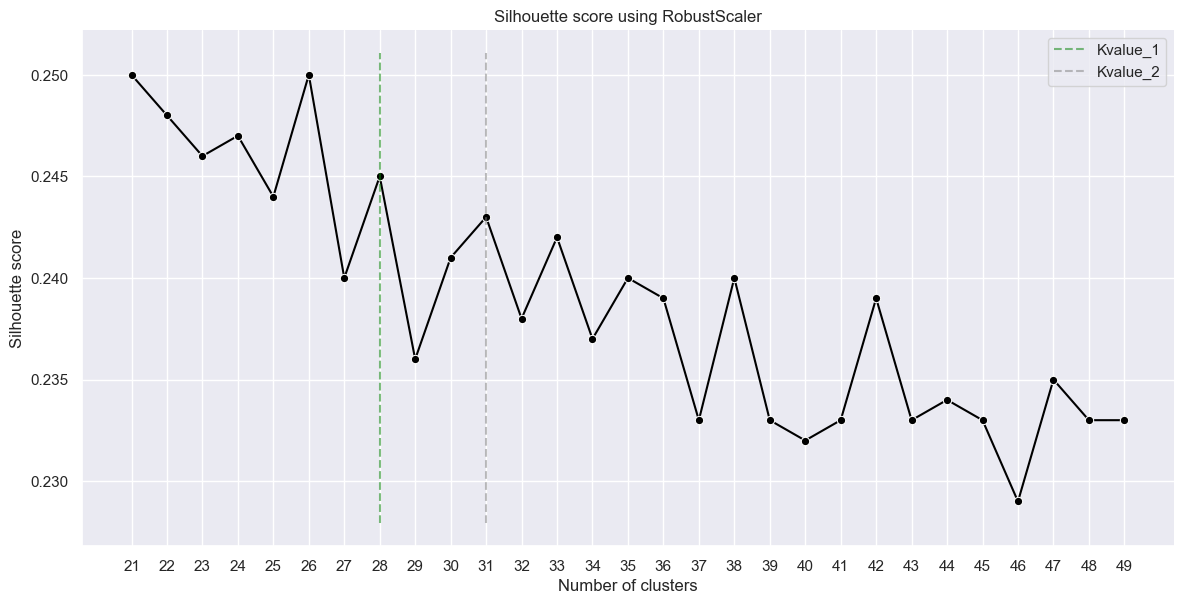

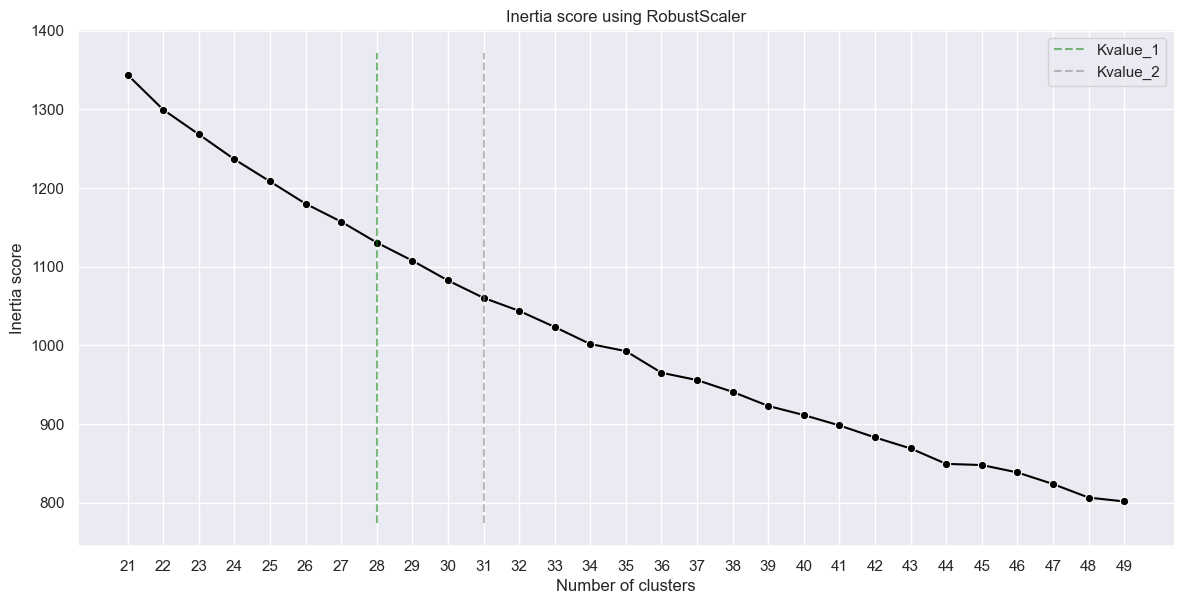

In [29]:
opt_k_vals = [28,31]

sns.set_theme(style='darkgrid', color_codes=True)

# Draw Silhouette score
plot = (
    sns.relplot(kind="line",x=range(k_min,k_max),y=diff_k_sil_score_l,marker='o',height=6,aspect=2,color="black")
    .set(title=f"Silhouette score using {scaling}")
    .set_axis_labels("Number of clusters", "Silhouette score")
    .set(xticks=range(k_min,k_max,1))
)
ymin,ymax = plot.ax.get_ylim()
draw_2styled_vlines(opt_k_vals,ymin,ymax)



# Draw Inertia score
plot = (
    sns.relplot(kind="line",x=range(k_min,k_max),y=diff_k_inertia_l,marker='o',height=6,aspect=2,color="black")
    .set(title=f"Inertia score using {scaling}")
    .set(xlabel="Number of clusters")
    .set(ylabel="Inertia score")
    .set(xticks=range(k_min,k_max,1))
)
ymin,ymax = plot.ax.get_ylim()
draw_2styled_vlines(opt_k_vals,ymin,ymax)



plt.show()

### Use QuantileTransformer

In [30]:
scaling = "QuantileTransformer"
diff_k_inertia_l = []
diff_k_sil_score_l = []

for k_val in range(k_min,k_max):
    kmean_result = run_kmean_allscalers(songs_c_df,k_val,scaling)
    diff_k_inertia_l.append(kmean_result[0])
    diff_k_sil_score_l.append(kmean_result[1])

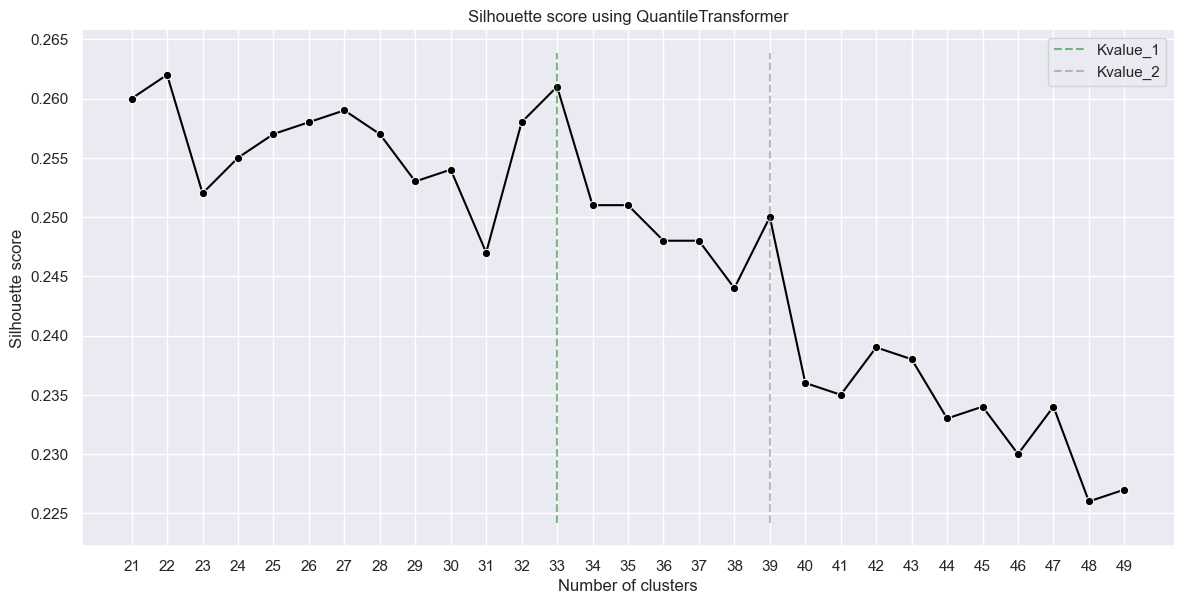

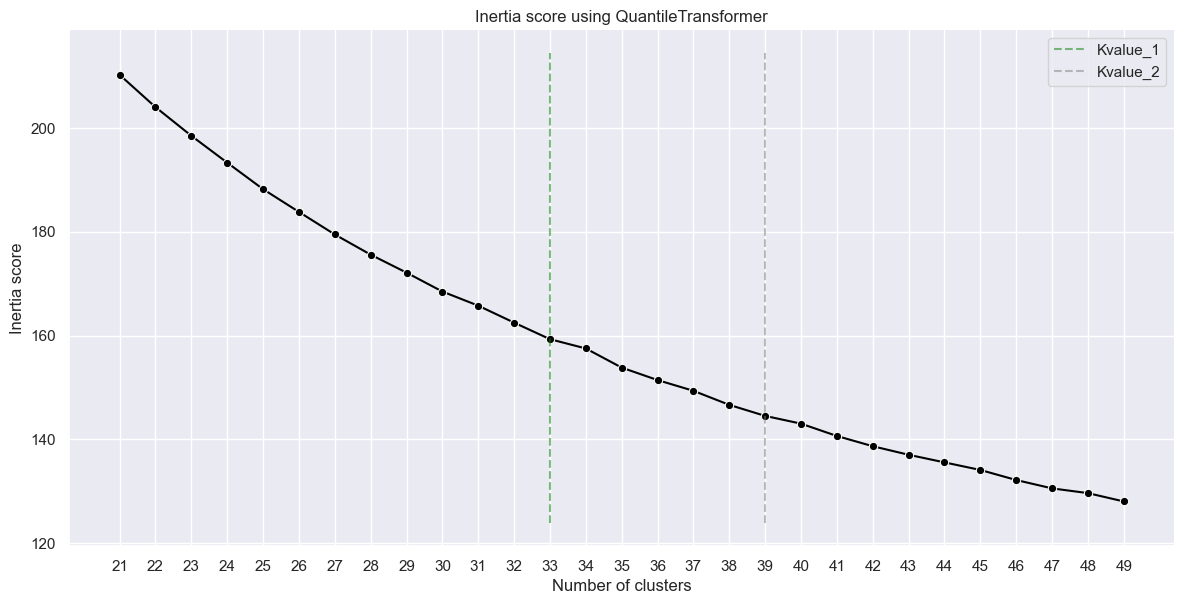

In [32]:
opt_k_vals = [33,39]

sns.set_theme(style='darkgrid', color_codes=True)

# Draw Silhouette score
plot = (
    sns.relplot(kind="line",x=range(k_min,k_max),y=diff_k_sil_score_l,marker='o',height=6,aspect=2,color="black")
    .set(title=f"Silhouette score using {scaling}")
    .set_axis_labels("Number of clusters", "Silhouette score")
    .set(xticks=range(k_min,k_max,1))
)
ymin,ymax = plot.ax.get_ylim()
draw_2styled_vlines(opt_k_vals,ymin,ymax)



# Draw Inertia score
plot = (
    sns.relplot(kind="line",x=range(k_min,k_max),y=diff_k_inertia_l,marker='o',height=6,aspect=2,color="black")
    .set(title=f"Inertia score using {scaling}")
    .set(xlabel="Number of clusters")
    .set(ylabel="Inertia score")
    .set(xticks=range(k_min,k_max,1))
)
ymin,ymax = plot.ax.get_ylim()
draw_2styled_vlines(opt_k_vals,ymin,ymax)



plt.show()

### Use PowerTransformer

In [33]:
scaling = "PowerTransformer"
diff_k_inertia_l = []
diff_k_sil_score_l = []

for k_val in range(k_min,k_max):
    kmean_result = run_kmean_allscalers(songs_c_df,k_val,scaling)
    diff_k_inertia_l.append(kmean_result[0])
    diff_k_sil_score_l.append(kmean_result[1])

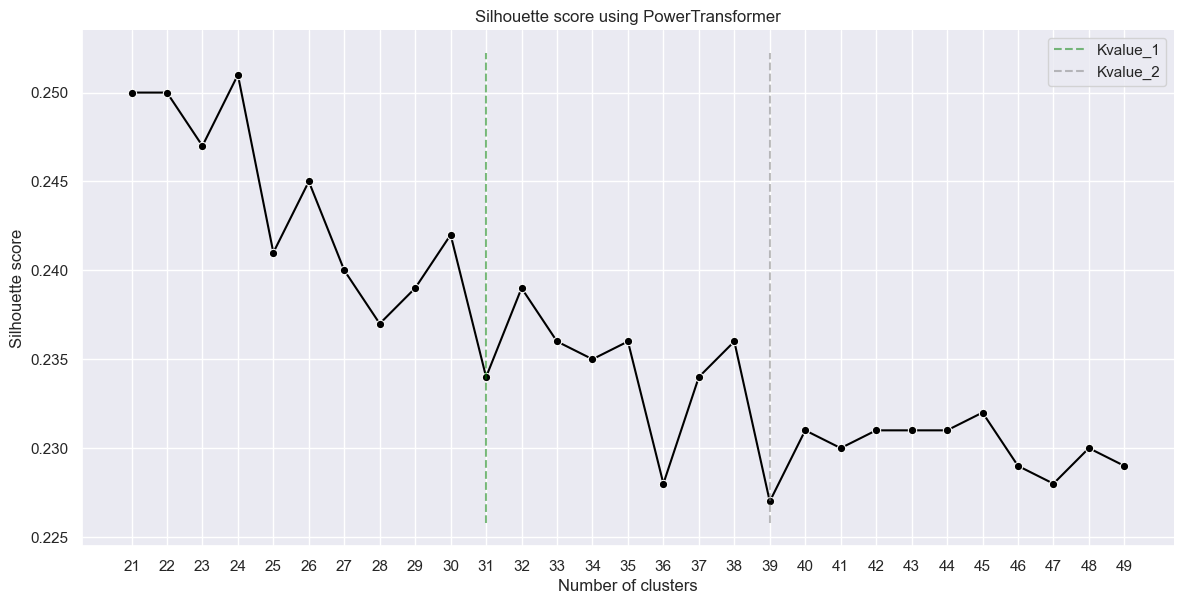

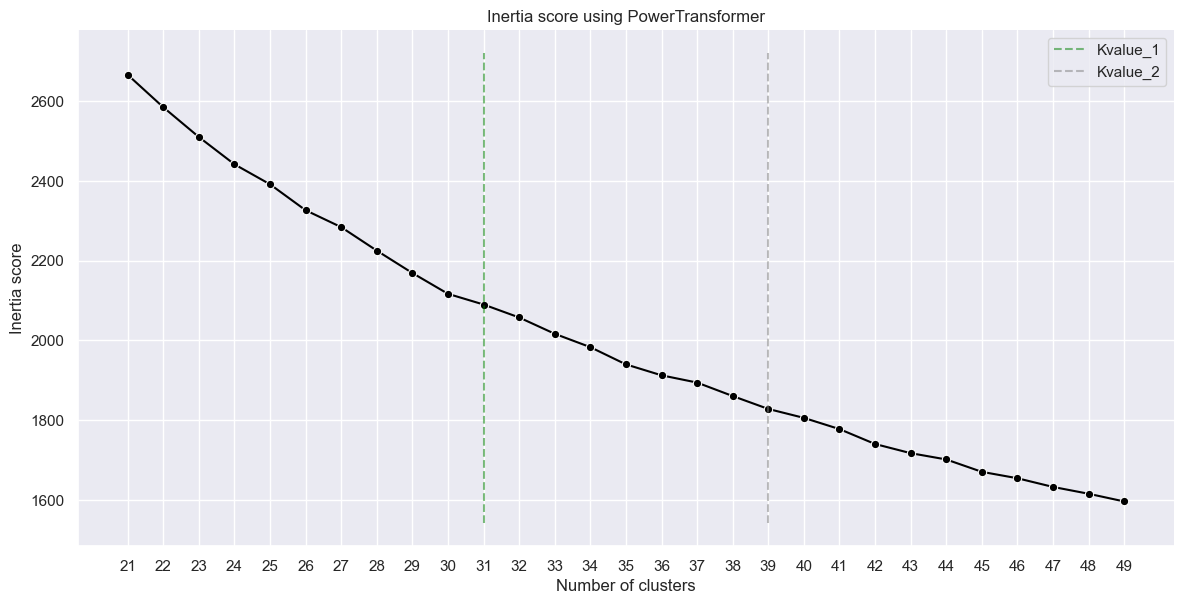

In [34]:
opt_k_vals = [31,39]

sns.set_theme(style='darkgrid', color_codes=True)

# Draw Silhouette score
plot = (
    sns.relplot(kind="line",x=range(k_min,k_max),y=diff_k_sil_score_l,marker='o',height=6,aspect=2,color="black")
    .set(title=f"Silhouette score using {scaling}")
    .set_axis_labels("Number of clusters", "Silhouette score")
    .set(xticks=range(k_min,k_max,1))
)
ymin,ymax = plot.ax.get_ylim()
draw_2styled_vlines(opt_k_vals,ymin,ymax)



# Draw Inertia score
plot = (
    sns.relplot(kind="line",x=range(k_min,k_max),y=diff_k_inertia_l,marker='o',height=6,aspect=2,color="black")
    .set(title=f"Inertia score using {scaling}")
    .set(xlabel="Number of clusters")
    .set(ylabel="Inertia score")
    .set(xticks=range(k_min,k_max,1))
)
ymin,ymax = plot.ax.get_ylim()
draw_2styled_vlines(opt_k_vals,ymin,ymax)



plt.show()

### Conclusion